In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d72b1396a7b1e406e7e652535fab487ccb2d70c9ea74763e92ed465b75612ff3
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.4 MB/s eta 0:00:00


In [ ]:
!pip install scipy

In [ ]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
import torch
from transformers import BertForSequenceClassification
import csv

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#ucitavanje data seta
file_name = "/content/Restaurant reviews.csv"
text_data = pd.read_csv(file_name, error_bad_lines=False)
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


<ipython-input-5-d803edfdadf5>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  text_data = pd.read_csv(file_name, error_bad_lines=False)


In [ ]:
#pregled par instanci seta podataka
text_data.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0


In [ ]:
#provera tipova podataka
text_data.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [ ]:
#provera da li ima null vrednosti
text_data.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
#provera da li ima duplikata
duplicates = text_data.duplicated().sum()
print('Number of duplicates found: ' + str(duplicates))
text_data = text_data.drop_duplicates()

Number of duplicates found: 36


In [ ]:
#kolona za linkove slika nam nije potrebna, ni kolona za imena
text_data = text_data.drop(['Reviewer', 'Rating', 'Metadata','Time','Pictures', 'Restaurant'], axis = 1)

In [ ]:
text_data = text_data.dropna(subset=['Review'])

In [ ]:
#izbacivanje stop reci sa dodatkom custom stop reci
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('restaurant')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

text_data['Review'] = text_data['Review'].apply(lambda x: remove_stopwords(x))
#lematizacija
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
text_data["Review"] = text_data["Review"].apply(lambda text: lemmatize_words(text))
#izbacivanje interpunkcije
import re, string
text_data['Review'] = text_data['Review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
print(text_data['Review'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0       The ambience good food quite good  Saturday lu...
1       Ambience good pleasant evening Service prompt ...
2       A must try great food great ambience Thnx serv...
3       Soumen da Arun great guy Only behavior sincere...
4       Food goodwe ordered Kodi drumstick basket mutt...
                              ...                        
9995    Madhumathi Mahajan Well start nice courteous s...
9996    This place never disappointed us The food cour...
9997    Bad rating mainly Chicken Bone found Veg food ...
9998    I personally love prefer Chinese Food Had coup...
9999    Checked try delicious chinese food here seen n...
Name: Review, Length: 9955, dtype: object


In [ ]:
#sentiment analiza
sent_model = SentimentIntensityAnalyzer()
def calc_sent(text):
    res = sent_model.polarity_scores(text)
    if (res['pos'] > 0.4):
        sent = 'positive'
    else:
        sent = 'negative'
    return sent
text_data['sent_score'] = text_data['Review'].apply(calc_sent)

In [ ]:
print(text_data)

                                                 Review sent_score
0     The ambience good food quite good  Saturday lu...   positive
1     Ambience good pleasant evening Service prompt ...   positive
2     A must try great food great ambience Thnx serv...   positive
3     Soumen da Arun great guy Only behavior sincere...   positive
4     Food goodwe ordered Kodi drumstick basket mutt...   positive
...                                                 ...        ...
9995  Madhumathi Mahajan Well start nice courteous s...   negative
9996  This place never disappointed us The food cour...   positive
9997  Bad rating mainly Chicken Bone found Veg food ...   negative
9998  I personally love prefer Chinese Food Had coup...   negative
9999  Checked try delicious chinese food here seen n...   negative

[9955 rows x 2 columns]


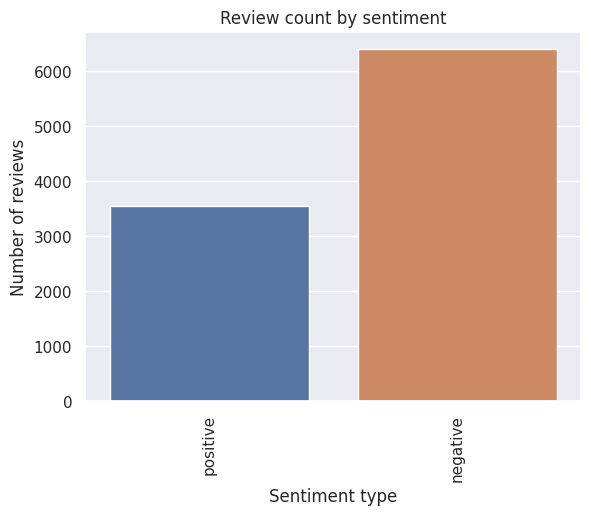

In [ ]:
#pregled balansiranosti sentimenata
sns.set()
labels = pd.unique(text_data['sent_score'])
countByClass = text_data.groupby('sent_score').size().sort_values()
sns.barplot(x = labels, y = countByClass,data=text_data)
plt.title('Review count by sentiment')
plt.xlabel('Sentiment type')
plt.xticks(rotation=90)
plt.ylabel('Number of reviews')
plt.show()

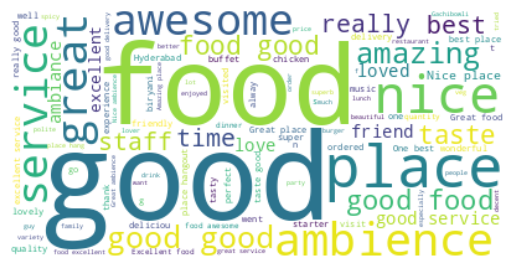

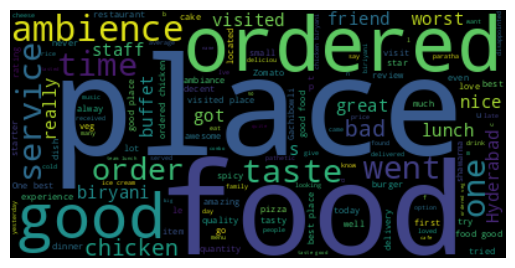

In [ ]:
#word cloud za pozitivne i negativne komentare
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pos_text_data = text_data.loc[text_data['sent_score'] == 'positive']
neg_text_data = text_data.loc[text_data['sent_score'] == 'negative']
wordcloud_pos= WordCloud(background_color="white").generate(pos_text_data['Review'].to_string())
wordcloud_neg= WordCloud().generate(neg_text_data['Review'].to_string())
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from transformers.models.auto import auto_factory
from transformers import BertTokenizer, AutoTokenizer, RobertaTokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
auto_tokenizer = AutoTokenizer.from_pretrained('roberta-base', add_prefix_space=False)
labels = {'negative':0,
          'positive':1
         }
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['sent_score']]
        self.texts = [auto_tokenizer(text,
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['Review']]
    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
np.random.seed(112)
df_train, df_val, df_test = np.split(text_data.sample(frac=1, random_state=42),
                                     [int(.8*len(text_data)), int(.9*len(text_data))])

print(len(df_train),len(df_val), len(df_test))

7964 995 996


In [ ]:
from torch import nn
from transformers import BertModel, BertForSequenceClassification, RobertaModel
#definisanje klase za BERT
class BertClassifier(nn.Module):

    def __init__(self, dropout = 0.2):
        super(BertClassifier, self).__init__()
        self.bert =  BertModel.from_pretrained('bert-base-uncased', num_labels=2)
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 2)
        self.relu = nn.ReLU()


    def forward(self, input_id, mask):
        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)
        return final_layer

In [ ]:
#definisanje klase za Robertu
class RobertaClassifier(nn.Module):
    def __init__(self, dropout = 0.2):
        super(RobertaClassifier, self).__init__()
        self.roberta =  RobertaModel.from_pretrained('roberta-base', num_labels = 2)
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 2)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):
        _, pooled_output = self.roberta(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)
        return final_layer

In [ ]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:
        model = model.cuda()
        criterion = criterion.cuda()

    #zbog grafickog prikaza rezultata
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, train_label.long())
                total_loss_train += float(batch_loss.item())
                train_loss.append(total_loss_train)

                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += float(acc)
                train_acc.append(total_acc_train)
                model.zero_grad()
                batch_loss.backward()
                optimizer.step()

            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    val_loss.append(total_loss_val)

                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
                    val_acc.append(total_acc_val)

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
EPOCHS = 5
LR = 1e-5


In [ ]:
#treniranje BERT-a
model = BertClassifier()
train(model, df_train, df_val, LR, EPOCHS)

100%|██████████| 3982/3982 [13:31<00:00,  4.91it/s]


Epochs: 1 | Train Loss:  0.138                 | Train Accuracy:  0.880                 | Val Loss:  0.089                 | Val Accuracy:  0.924


100%|██████████| 3982/3982 [13:31<00:00,  4.91it/s]


Epochs: 2 | Train Loss:  0.060                 | Train Accuracy:  0.953                 | Val Loss:  0.104                 | Val Accuracy:  0.935


100%|██████████| 3982/3982 [13:30<00:00,  4.91it/s]


Epochs: 3 | Train Loss:  0.024                 | Train Accuracy:  0.984                 | Val Loss:  0.100                 | Val Accuracy:  0.939


100%|██████████| 3982/3982 [13:31<00:00,  4.91it/s]


Epochs: 4 | Train Loss:  0.013                 | Train Accuracy:  0.991                 | Val Loss:  0.126                 | Val Accuracy:  0.931


100%|██████████| 3982/3982 [13:30<00:00,  4.91it/s]


Epochs: 5 | Train Loss:  0.007                 | Train Accuracy:  0.994                 | Val Loss:  0.144                 | Val Accuracy:  0.932


In [ ]:
#cuvanje modela
model_name = 'bert_classifier_rest_reviews.pt'
path = F"/content/drive/MyDrive/{model_name}"
torch.save(model.state_dict(), path)

In [ ]:
#ucitavanje modela
model.load_state_dict(torch.load(path))
model.eval()

BertClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [ ]:
from lime.lime_text import LimeTextExplainer

In [ ]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1024"

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

2862

In [ ]:
def predict_proba(text):
      use_cuda = torch.cuda.is_available()
      device = torch.device("cuda" if use_cuda else "cpu")
      encoding = bert_tokenizer(text,
                         padding='max_length',
                         max_length = 512,
                         truncation=True,
                         return_tensors="pt")
      input_ids = encoding['input_ids'].squeeze(1).to(device)
      attention_mask = encoding['attention_mask'].to(device)
      with torch.no_grad():
        outputs = model(input_ids, attention_mask)
      pred_probab = nn.Softmax(dim=1)(outputs)
      pred_probab = pred_probab.cpu()
      return pred_probab.numpy()

In [ ]:
predict_proba(df_test.iloc[6]['Review'])

array([[3.3972014e-04, 9.9966025e-01]], dtype=float32)

In [ ]:
#Explainability uz LIME, za datu instancu
explainer = LimeTextExplainer()
exp = explainer.explain_instance(df_test.iloc[6]['Review'], classifier_fn = predict_proba, num_features = 10, num_samples = 100)
exp.show_in_notebook(text=True)

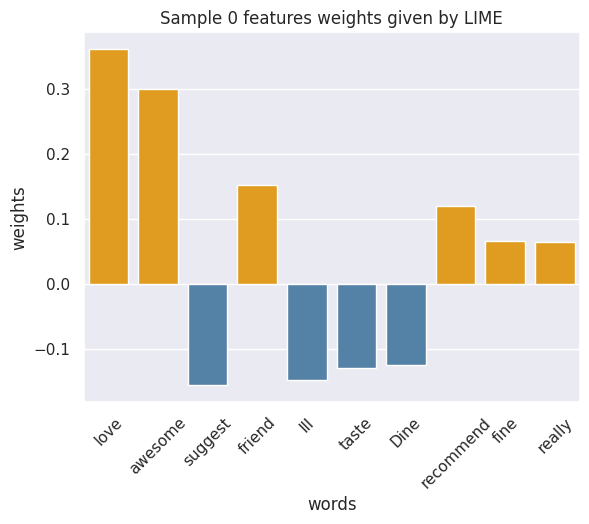

In [ ]:
from collections import OrderedDict
sns.set()
weights = OrderedDict(exp.as_list())
lime_weights = pd.DataFrame({"words": list(weights.keys()), "weights": list(weights.values())})
lime_weights[['weights']] = lime_weights[['weights']].astype(float)
cols = []
def pick_color():
  for instance in lime_weights['weights']:
    if instance>0:
      cols.append('orange')
    else:
      cols.append('steelblue')
  return cols
col_pallete = pick_color()
sns.barplot(x = "words", y = "weights", data = lime_weights, palette = col_pallete)
plt.xticks(rotation = 45)
plt.title("Sample {} features weights given by LIME".format(0))
plt.show()

In [ ]:
# koristimo isti model koji je fine-tunnovan na Restaurant reviews datasetu
import transformers
import scipy as sp
import shap
import torch.nn.functional as F
def predictor(x):
    encoding = bert_tokenizer(x,
                         padding='max_length',
                         max_length = 512,
                         truncation=True,
                         return_tensors="pt")
    device = torch.device("cuda")
    input_ids = encoding['input_ids'].squeeze(1).to(device)
    attention_mask = encoding['attention_mask'].to(device)
    with torch.no_grad():
        outputs = model(input_ids, attention_mask)
    probas = F.softmax(outputs.cpu(), dim=1).detach().numpy()
    val = sp.special.logit(probas[:,1])
    return val
def f_batch(x):
    val = np.array([])
    for i in x:
      val = np.append(val, predictor(i))
    return val

explainer_bert = shap.Explainer(f_batch, bert_tokenizer)
test = {'label': [1], 'text': [df_test.iloc[6]['Review']]}
shap_values = explainer_bert(test, fixed_context=1)
shap.plots.text(shap_values)

In [ ]:
#treniranje RoBERT-e
roberta_model = RobertaClassifier()
train(roberta_model, df_train, df_val, LR, EPOCHS)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 3982/3982 [13:34<00:00,  4.89it/s]


Epochs: 1 | Train Loss:  0.158                 | Train Accuracy:  0.851                 | Val Loss:  0.126                 | Val Accuracy:  0.904


100%|██████████| 3982/3982 [13:36<00:00,  4.88it/s]


Epochs: 2 | Train Loss:  0.088                 | Train Accuracy:  0.927                 | Val Loss:  0.100                 | Val Accuracy:  0.917


100%|██████████| 3982/3982 [13:36<00:00,  4.88it/s]


Epochs: 3 | Train Loss:  0.047                 | Train Accuracy:  0.963                 | Val Loss:  0.168                 | Val Accuracy:  0.901


100%|██████████| 3982/3982 [13:37<00:00,  4.87it/s]


Epochs: 4 | Train Loss:  0.023                 | Train Accuracy:  0.985                 | Val Loss:  0.141                 | Val Accuracy:  0.924


100%|██████████| 3982/3982 [13:36<00:00,  4.88it/s]


Epochs: 5 | Train Loss:  0.017                 | Train Accuracy:  0.989                 | Val Loss:  0.119                 | Val Accuracy:  0.920


In [ ]:
roberta_model.eval()

RobertaClassifier(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [ ]:
torch.cuda.empty_cache()
gc.collect()

0

In [ ]:
#funkcija modifikovana za RoBERT-u
def predict_proba(text):
      use_cuda = torch.cuda.is_available()
      device = torch.device("cuda" if use_cuda else "cpu")
      encoding = auto_tokenizer(text,
                         padding='max_length',
                         max_length = 512,
                         truncation=True,
                         return_tensors="pt")
      input_ids = encoding['input_ids'].squeeze(1).to(device)
      attention_mask = encoding['attention_mask'].to(device)
      with torch.no_grad():
        outputs = roberta_model(input_ids, attention_mask)
      pred_probab = nn.Softmax(dim=1)(outputs)
      pred_probab = pred_probab.cpu()
      return pred_probab.numpy()

In [ ]:
#Explainability uz LIME, za datu instancu (klasifikator je sada RoBERT-a)
explainer = LimeTextExplainer()
exp = explainer.explain_instance(df_test.iloc[6]['Review'], classifier_fn = predict_proba, num_features = 10, num_samples = 100)
exp.show_in_notebook(text=True)

In [ ]:
# kao model je korišćena RoBERT-a
import transformers
import scipy as sp
import torch.nn.functional as F
import shap
def predictor(x):
    encoding = auto_tokenizer(x,
                         padding='max_length',
                         max_length = 512,
                         truncation=True,
                         return_tensors="pt",
                        )
    device = torch.device("cuda")
    input_ids = encoding['input_ids'].squeeze(1).to(device)
    attention_mask = encoding['attention_mask'].to(device)
    with torch.no_grad():
        outputs = roberta_model(input_ids, attention_mask)
    probas = F.softmax(outputs.cpu(), dim=1).detach().numpy()
    val = sp.special.logit(probas[:,1])
    return val

def f_batch(x):
    val = np.array([])
    for i in x:
      val = np.append(val, predictor(i))
    return val

explainer_roberta = shap.Explainer(f_batch, auto_tokenizer)
test = {'label': [1], 'text': [df_test.iloc[6]['Review']]}
shap_values = explainer_roberta(test, fixed_context = 1)
shap.plots.text(shap_values)